In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("C:\\Users\\Sunilkumar T\\Desktop\\breast.csv")

In [14]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BiandChrome,NormNucl,Mlt,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
df.shape,df.size

((698, 11), 7678)

In [15]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BiandChrome    699
NormNucl       699
Mlt            699
Class          699
dtype: int64

In [16]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [17]:
benign = df[df['Class']==2]
malignant = df[df['Class']==4]

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

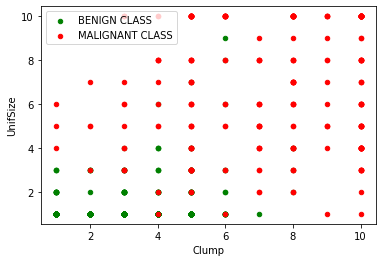

In [21]:
axes = benign.plot(kind = 'scatter', x="Clump" , y="UnifSize", color = 'green' ,label = "BENIGN CLASS")
malignant.plot(kind = 'scatter', x="Clump" , y="UnifSize", color = 'red' ,label = "MALIGNANT CLASS",ax=axes)


In [24]:
df = df[pd.to_numeric(df["BareNuc"],errors = "coerce").notnull()]

In [25]:
df["BareNuc"] = df["BareNuc"].astype("int")

In [26]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BiandChrome    int64
NormNucl       int64
Mlt            int64
Class          int64
dtype: object

In [27]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BiandChrome', 'NormNucl', 'Mlt', 'Class'],
      dtype='object')

In [32]:
feature = df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BiandChrome','NormNucl','Mlt']]

In [33]:
x = np.asarray(feature)

In [34]:
y = np.asarray(df["Class"])

In [35]:
x

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [36]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [39]:
x_train.shape

(546, 9)

In [40]:
x_test.shape

(137, 9)

In [41]:
y_train.shape

(546,)

In [42]:
y_test.shape

(137,)

# Model Creation

In [44]:
from sklearn import svm

In [46]:
model = svm.SVC(kernel = 'linear',gamma ="auto",C =0.3)

In [47]:
model.fit(x_train,y_train)

SVC(C=0.3, gamma='auto', kernel='linear')

In [48]:
y_predicted = model.predict(x_test)

//Evaluating precision

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        83
           4       0.93      0.98      0.95        54

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137

